# TPE SUR LES DIFFERENTES ERREURS
### Liste des Membres du groupe : 

- **KEMBOU FOSSO RICHEL : 22U2118**
- **KELODJOU DJOMO NAFISSATOU IVANA : 22T2894**
- **MEFFO TAHAFO LEA JECY : 22U2194**
- **TSEMEGNE MARTIN YVAN : 22U2080**

In [12]:
import sympy as sp
sp.init_printing()

In [13]:
x, y, z = sp.symbols('x y z')
N, i = sp.symbols('N i', integer=True, positive=True)
y = sp.Function('y')(i)
y_hat = sp.Function('y_hat')(i)
a, b = sp.symbols('a b', real=True)

## ERREUR QUADRATIQUE MOYENNE

L'Erreur Quadratique Moyenne (MSE, de l'anglais Mean Squared Error) est une métrique utilisée pour évaluer la performance des modèles de régression, représentant la moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles.Elle est donnée par

In [14]:
EQM = (1 / N )* sp.summation((y - y_hat)**2 ,(i, 1, N))
sp.pprint(EQM.simplify())

  N                    
 ___                   
 ╲                     
  ╲                   2
  ╱   (y(i) - yₕₐₜ(i)) 
 ╱                     
 ‾‾‾                   
i = 1                  
───────────────────────
           N           


### 1.Fournissons l expression du  gradient

In [6]:
i = 0

grad_mse = sp.diff(EQM, y_hat)
print("Le gradient de cette erreur sans la somme est  : ", end="")
sp.pprint(grad_mse.simplify())

Le gradient de cette erreur sans la somme est  :     N                    
   ___                   
   ╲                     
    ╲                    
2⋅  ╱   (-y(i) + yₕₐₜ(i))
   ╱                     
   ‾‾‾                   
  i = 1                  
─────────────────────────
            N            


### 2.Etude de la convexité de l'erreur quadratique moyenne

In [12]:
import sympy as sp

# Définition des symboles
N, i = sp.symbols('N i', integer=True, positive=True)
y = sp.Function('y')(i)
y_hat = sp.Function('y_hat')(i)

# Fonction coût EQM (Erreur Quadratique Moyenne)
EQM = (1 / N) * sp.summation((y - y_hat)**2, (i, 1, N))

# Gradient (première dérivée par rapport à y_hat)
grad_mse = sp.diff(EQM, y_hat)

# Hessienne (deuxième dérivée par rapport à y_hat)
hess_mse = sp.diff(grad_mse, y_hat)

print("Gradient : ")
sp.pprint(grad_mse.simplify())

print("\nDérivée seconde (Hessienne en 1D) : ")
sp.pprint(hess_mse.simplify())

# Vérification de la convexité : la dérivée seconde doit être >= 0
is_convex = sp.simplify(hess_mse) >= 0
print("\nEst ce que cette fonction est convexe ?", is_convex)


Gradient : 
    N                    
   ___                   
   ╲                     
    ╲                    
2⋅  ╱   (-y(i) + yₕₐₜ(i))
   ╱                     
   ‾‾‾                   
  i = 1                  
─────────────────────────
            N            

Dérivée seconde (Hessienne en 1D) : 
2

Est ce que cette fonction est convexe ? True



### Justification de la Convexité

Le résultat du calcul de la dérivée seconde est :

$$\frac{\partial^2 \text{EQM}}{\partial \mathbf{\hat{y}}^2} = \frac{\partial}{\partial \mathbf{\hat{y}}} \left( \frac{2}{N} \sum_{i=1}^{N} (\mathbf{\hat{y}} - \mathbf{y}) \right)$$

$$= \frac{2}{N} \sum_{i=1}^{N} \frac{\partial}{\partial \mathbf{\hat{y}}} (\mathbf{\hat{y}} - \mathbf{y}) = \frac{2}{N} \sum_{i=1}^{N} 1 = \frac{2}{N} \times N = 2$$

Comme la dérivée seconde de l'Erreur Quadratique Moyenne par rapport à $\mathbf{\hat{y}}$ est **$2$**, qui est une constante **strictement positive** ($2 > 0$), la fonction EQM est **strictement convexe** par rapport à $\mathbf{\hat{y}}$.



### Propriétés de Convexité étudiées

La convexité de l'EQM est établie en utilisant la propriété suivante :

1.  **Caractérisation de second ordre de la convexité (Propriété fondamentale)** :
    * Pour une fonction $f$ deux fois dérivable (de classe $\mathcal{C}^2$) à une seule variable, $f$ est convexe si et seulement si sa dérivée seconde est positive : $f''(x) \ge 0$.
    * Dans notre cas, $\frac{\partial^2 \text{EQM}}{\partial \mathbf{\hat{y}}^2} = 2 > 0$, ce qui garantit la **stricte convexité** de l'erreur quadratique moyenne.

## 3 Représentons les courbes de l'erreur quadratique Moyenne ainsi que l'équation de la tangente à l ellipse au point de coordonnées données.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats


In [17]:
# =============================================================================
# CHARGEMENT ET PRÉPARATION DES DONNÉES (CORRECTION DÉFINITIVE)
# =============================================================================

print("=== TENTATIVE DE CHARGEMENT ET VÉRIFICATION ===")

# Hypothèse la plus probable: En-tête présent (X1, X2, Y_Cible) et séparateur = virgule (',')
try:
    # Tente de charger le fichier en supposant l'en-tête (par défaut) et la virgule comme séparateur.
    data = pd.read_csv('regression_data.csv', sep=',')
    print("Chargement réussi avec séparateur ',' et en-tête.")

except Exception as e:
    # Deuxième hypothèse: En-tête présent (par la première ligne) et séparateur = espaces multiples
    print(f"Erreur avec la virgule ({e}). Tentative avec séparateur d'espaces multiples...")
    try:
        # Utilise sep='\s+' (un ou plusieurs espaces) et engine='python' pour une flexibilité maximale
        data = pd.read_csv('regression_data.csv', sep='\s+', engine='python')
        print("Chargement réussi avec séparateur d'espaces multiples et en-tête.")
    except Exception as e2:
        print(f"ERREUR FATALE: Le fichier n'a pu être chargé. Erreur: {e2}")
        exit() # Arrête le script si le chargement échoue

# Renommer la colonne cible (si elle n'est pas déjà 'y')
if 'Y_Cible' in data.columns:
    data = data.rename(columns={'Y_Cible': 'y'})
elif 'y' not in data.columns:
    # Cas où il n'y a pas d'en-tête clair, mais seulement des indices numériques.
    # On suppose que la dernière colonne est 'y'.
    if len(data.columns) >= 3:
         data.columns = ['X1', 'X2', 'y']
         print("Noms de colonnes forcés à X1, X2, y.")

# VÉRIFICATION
print("=== STRUCTURE DES DONNÉES ===")
print(data.head())
print(f"\nDimensions des données : {data.shape}")
print(f"Noms des colonnes : {list(data.columns)}")

if 'X1' not in data.columns or 'X2' not in data.columns or 'y' not in data.columns:
    print("\nERREUR D'ANALYSE: Les noms de colonnes X1, X2 ou y sont manquants. Arrêt du script.")
    exit()

print("\n=== STATISTIQUES DES DONNÉES ===")
print(data.describe())


=== TENTATIVE DE CHARGEMENT ET VÉRIFICATION ===
Chargement réussi avec séparateur ',' et en-tête.
=== STRUCTURE DES DONNÉES ===
         X1        X2          y
0 -1.254599  2.722448  -4.965005
1  4.507143 -3.012843  29.467574
2  2.319939 -4.944779  27.030067
3  0.986585  3.154614  14.040252
4 -3.439814  2.068573  -5.033671

Dimensions des données : (70, 3)
Noms des colonnes : ['X1', 'X2', 'y']

=== STATISTIQUES DES DONNÉES ===
              X1         X2          y
count  70.000000  70.000000  70.000000
mean   -0.325178  -0.081019   9.481944
std     3.039528   2.929238  12.085958
min    -4.794155  -4.944779 -14.602372
25%    -3.123634  -2.660783   0.108284
50%    -0.639512   0.011831   6.218486
75%     2.260136   2.684216  19.347750
max     4.868869   4.717821  30.300685



VISUALISATION DES DONNÉES


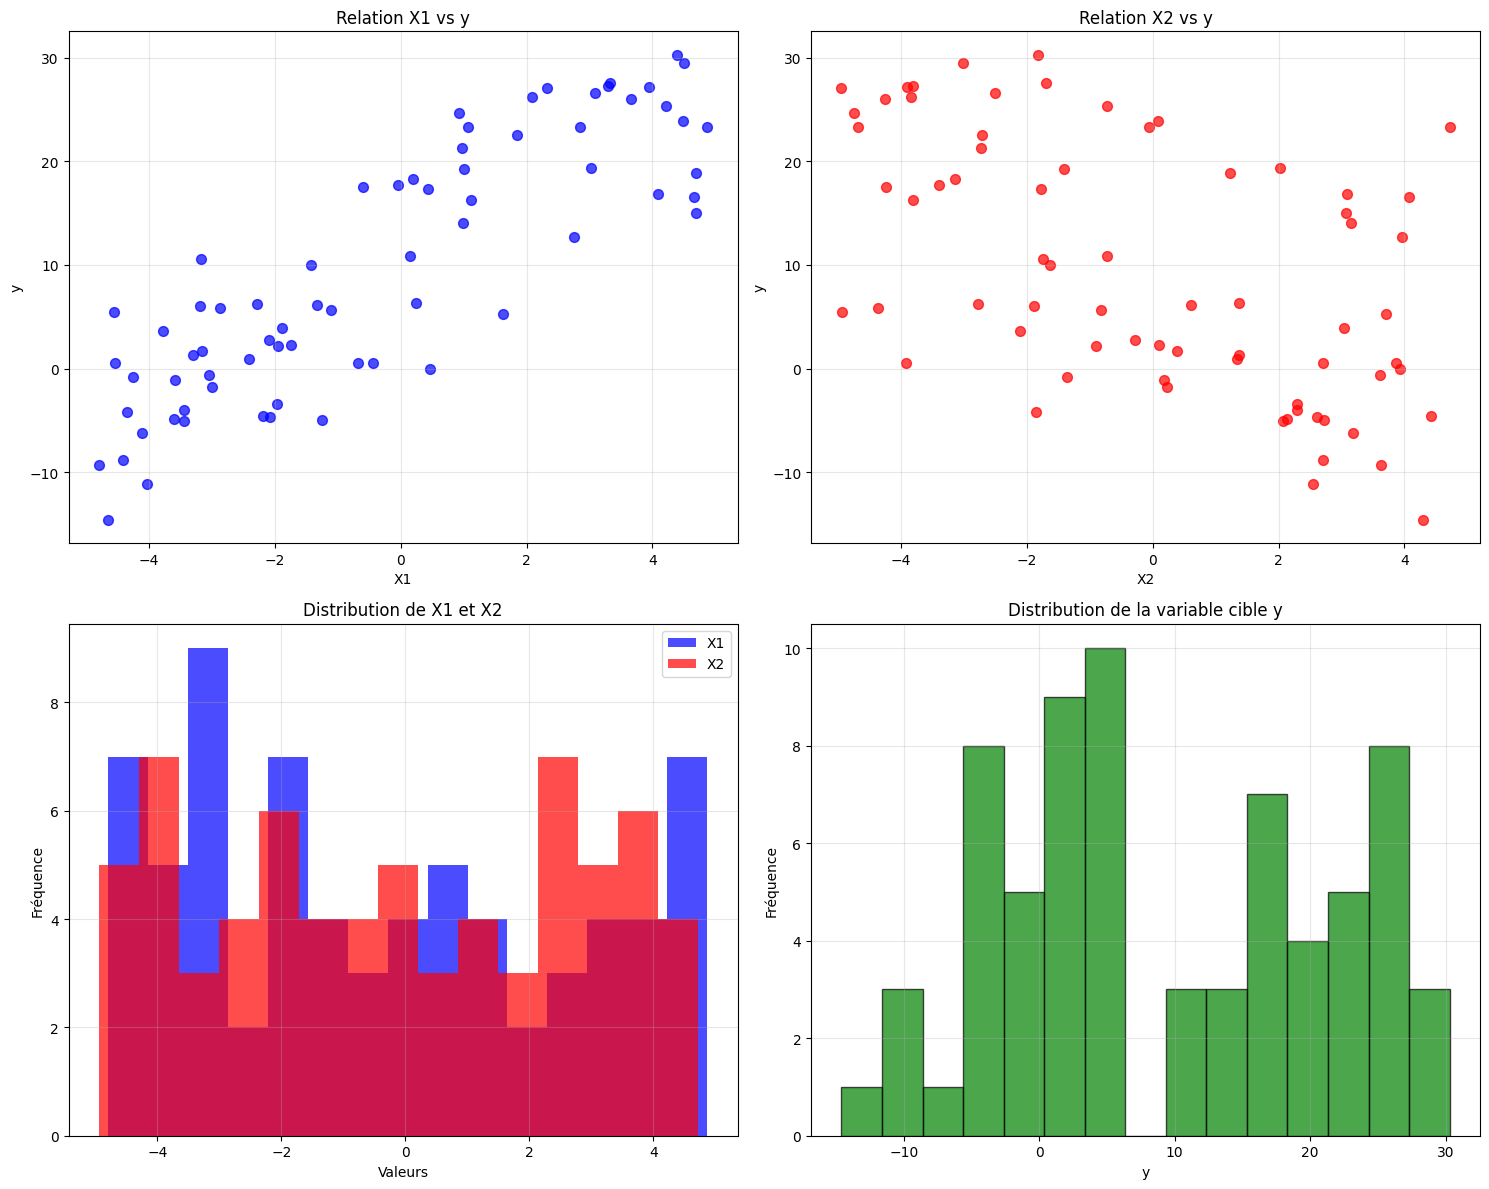

In [19]:

# =============================================================================
# 1. VISUALISATION EXPLORATOIRE DES DONNÉES
# =============================================================================

print("\n" + "="*50)
print("VISUALISATION DES DONNÉES")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graphique X1 vs y
axes[0, 0].scatter(data['X1'], data['y'], alpha=0.7, color='blue', s=50)
axes[0, 0].set_xlabel('X1')
axes[0, 0].set_ylabel('y')
axes[0, 0].set_title('Relation X1 vs y')
axes[0, 0].grid(True, alpha=0.3)

# Graphique X2 vs y
axes[0, 1].scatter(data['X2'], data['y'], alpha=0.7, color='red', s=50)
axes[0, 1].set_xlabel('X2')
axes[0, 1].set_ylabel('y')
axes[0, 1].set_title('Relation X2 vs y')
axes[0, 1].grid(True, alpha=0.3)

# Distribution de X1 et X2
axes[1, 0].hist(data['X1'], bins=15, alpha=0.7, color='blue', label='X1')
axes[1, 0].hist(data['X2'], bins=15, alpha=0.7, color='red', label='X2')
axes[1, 0].set_xlabel('Valeurs')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution de X1 et X2')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Distribution de y
axes[1, 1].hist(data['y'], bins=15, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].set_xlabel('y')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].set_title('Distribution de la variable cible y')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


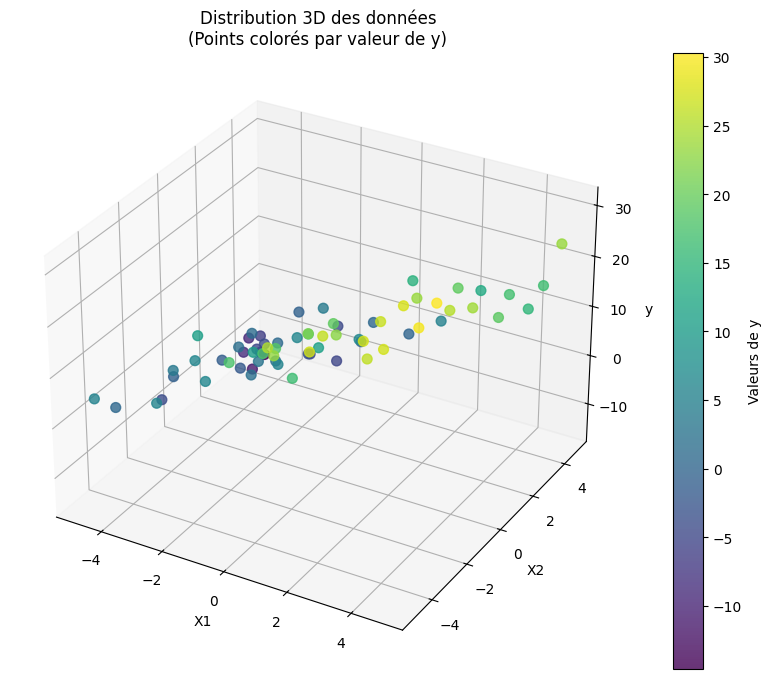

In [20]:

# Graphique 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['X1'], data['X2'], data['y'], 
                     c=data['y'], cmap='viridis', s=50, alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Distribution 3D des données\n(Points colorés par valeur de y)')
plt.colorbar(scatter, ax=ax, label='Valeurs de y')
plt.show()

### a) Représentons les courbes de l'erreur quadratique Moyenne


VISUALISATION DE LA FONCTION DE COÛT (EQM) AVEC SYMPY
Expression symbolique de l'EQM :
  N                                     
 ___                                    
 ╲                                      
  ╲                                    2
  ╱   (β₀ + β₁⋅X₁(i) + β₂⋅X₂(i) - y(i)) 
 ╱                                      
 ‾‾‾                                    
i = 1                                   
────────────────────────────────────────
                   N                    


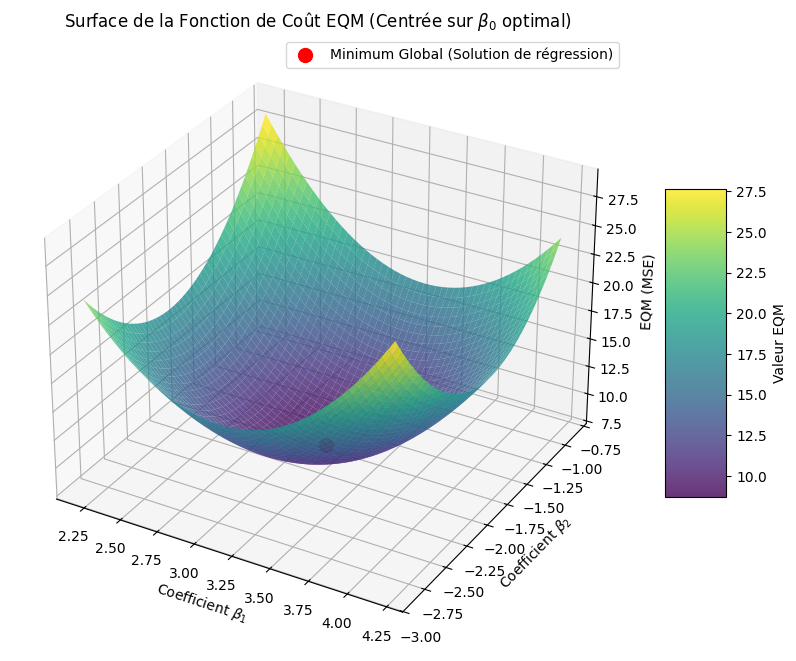

In [33]:
# =============================================================================
# 9. VISUALISATION DE LA FONCTION DE COÛT (EQM) AVEC SYMPY
# =============================================================================

print("\n" + "="*50)
print("VISUALISATION DE LA FONCTION DE COÛT (EQM) AVEC SYMPY")
print("="*50)

# Récupérer les coefficients optimaux
b1_opt = model_linear.coef_[0]
b2_opt = model_linear.coef_[1]
b0_opt = model_linear.intercept_

import sympy as sp

# Définir les symboles SymPy
b1_sym, b2_sym, b0_sym = sp.symbols('beta_1 beta_2 beta_0')
N_sym = sp.Symbol('N', integer=True, positive=True)
i_sym = sp.Symbol('i', integer=True, positive=True)

# Symboles pour les données (on les traite comme des constantes)
y_i = sp.Function('y')(i_sym)
X1_i = sp.Function('X1')(i_sym)
X2_i = sp.Function('X2')(i_sym)

# Définition symbolique de l'EQM
y_hat_sym = b0_sym + b1_sym * X1_i + b2_sym * X2_i
erreur_sym = y_hat_sym - y_i
erreur_quadratique_sym = erreur_sym**2

# EQM symbolique complète
EQM_sym = (1/N_sym) * sp.Sum(erreur_quadratique_sym, (i_sym, 1, N_sym))

print("Expression symbolique de l'EQM :")
sp.pprint(EQM_sym)

# Définir la fonction de coût EQM avec substitution SymPy
def calculate_eqm_surface_sympy(b1_val, b2_val, X1_data, X2_data, y_data, b0_const):
    """
    Calcule l'EQM en utilisant l'expression symbolique SymPy
    avec substitution des valeurs numériques
    """
    N = len(y_data)
    total_erreur = 0
    
    # Calcul de la somme des erreurs quadratiques
    for i in range(N):
        # Créer un dictionnaire de substitutions
        substitutions = {
            b0_sym: b0_const,
            b1_sym: b1_val, 
            b2_sym: b2_val,
            X1_i: X1_data[i],
            X2_i: X2_data[i],
            y_i: y_data[i]
        }
        
        # Calculer l'erreur quadratique pour cette observation
        erreur_quad_val = erreur_quadratique_sym.subs(substitutions)
        total_erreur += float(erreur_quad_val)
    
    # Calcul final de l'EQM
    eqm = total_erreur / N
    return eqm

# Créer une grille de coefficients pour b1 et b2 autour des valeurs optimales
b1_range = np.linspace(b1_opt - 1, b1_opt + 1, 50)
b2_range = np.linspace(b2_opt - 1, b2_opt + 1, 50)
B1_grid, B2_grid = np.meshgrid(b1_range, b2_range)

# Calculer l'EQM pour chaque paire de coefficients (b1, b2)
EQM_grid = np.array([
    calculate_eqm_surface(b1, b2, data['X1'].values, data['X2'].values, data['y'].values, b0_opt) 
    for b1, b2 in zip(B1_grid.ravel(), B2_grid.ravel())
]).reshape(B1_grid.shape)


# Visualisation 3D de la fonction de coût
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface de l'EQM
surf = ax.plot_surface(B1_grid, B2_grid, EQM_grid, 
                       cmap='viridis', alpha=0.8, antialiased=True)

# Marquer le minimum (le point trouvé par la régression)
ax.scatter([b1_opt], [b2_opt], [mse_linear], 
           color='red', marker='o', s=100, label='Minimum Global (Solution de régression)')

ax.set_xlabel(r'Coefficient $\beta_1$')
ax.set_ylabel(r'Coefficient $\beta_2$')
ax.set_zlabel('EQM (MSE)')
ax.set_title('Surface de la Fonction de Coût EQM (Centrée sur $\\beta_0$ optimal)')
fig.colorbar(surf, shrink=0.5, aspect=5, label='Valeur EQM')
ax.legend()
plt.show()


#### Explication:
ce graphique utilise les coefficients du modèle (β1​ et β2​) sur les axes pour montrer la valeur de l'erreur (EQM) sur le troisième axe.

Le code commence par récupérer les coefficients (β0​,β1​,β2​) déjà calculés par la méthode des moindres carrés lors de l'ajustement du modèle linéaire (model_linear.fit)

    Axe X : B1_grid → Valeurs du coefficient β₁

    Axe Y : B2_grid → Valeurs du coefficient β₂

    Axe Z : EQM_grid → Valeur de l'erreur EQM

Coordonnées du point rouge :

    X : b1_opt (coefficient optimal pour X1)

    Y : b2_opt (coefficient optimal pour X2)

    Z : mse_linear (valeur minimale de l'EQM)

Ainsi donc,La courbe EQM montre visuellement comment l'erreur varie avec les paramètres du modèle. C'est une surface convexe avec un minimum unique correspondant aux coefficients optimaux trouvés par la régression linéaire

## b.Trouver l équation de la tangente à l eclipse au point de coordonnées données

In [35]:
# =============================================================================
# 2. RÉGRESSION LINÉAIRE MULTIPLE
# =============================================================================

print("\n" + "="*50)
print("RÉGRESSION LINÉAIRE MULTIPLE")
print("="*50)

X = data[['X1', 'X2']]
y = data['y']

model_linear = LinearRegression()
model_linear.fit(X, y)

y_pred_linear = model_linear.predict(X)
mse_linear = mean_squared_error(y, y_pred_linear)

print(f"Coefficients : {model_linear.coef_}")
#print(f"Intercept : {model_linear.intercept_:.4f}")
print(f"MSE : {mse_linear:.4f}")
print(f"Équation : y = {model_linear.coef_[0]:.4f}*X1 + {model_linear.coef_[1]:.4f}*X2 + {model_linear.intercept_:.4f}")


RÉGRESSION LINÉAIRE MULTIPLE
Coefficients : [ 3.20480763 -1.86020681]
MSE : 8.7041
Équation : y = 3.2048*X1 + -1.8602*X2 + 10.3734


Ici,
* nous préparons les données
* puis,nous créons un modèle de régression linéaire vide 
* ensuite *.fit(X, y) * nous entraînons le modèle pour trouver les meilleurs coefficients c est à dire,: Le modèle cherche β₀, β₁, β₂ qui minimisent 
* et enfin nous passons à la prédiction et l evaluation